# VAMOS Quickstart

Minimal end-to-end run of NSGA-II on ZDT1 using the `optimize()` helper. Requires the `notebooks` extra for plotting (`matplotlib`).

In [1]:
from vamos import make_problem_selection, NSGAIIConfig, OptimizeConfig, optimize
from vamos.foundation.version import __version__
import matplotlib.pyplot as plt

print(f"VAMOS version: {__version__}")

VAMOS version: 0.1.0


In [2]:
# Build problem and algorithm config (small budget for notebook speed)
selection = make_problem_selection("zdt1", n_var=12)
problem = selection.instantiate()

cfg = (
    NSGAIIConfig()
    .pop_size(100)
    .offspring_size(100)
    .crossover("sbx", prob=0.9, eta=15.0)
    .mutation("pm", prob="1/n", eta=20.0)
    .selection("tournament", pressure=2)
    .survival("nsga2")
    .engine("numpy")
    .fixed()
).to_dict()

result = optimize(OptimizeConfig(problem=problem, algorithm="nsgaii", algorithm_config=cfg, termination=("n_eval", 10000), seed=42, engine="moocore"))
F = result.F
print("Final population shape:", F.shape)

Final population shape: (100, 2)


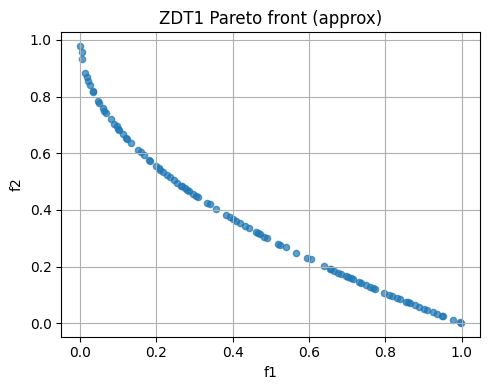

In [3]:
# Plot Pareto front approximation
plt.figure(figsize=(5, 4))
plt.scatter(F[:, 0], F[:, 1], s=20, c="tab:blue", alpha=0.7)
plt.xlabel("f1")
plt.ylabel("f2")
plt.title("ZDT1 Pareto front (approx)")
plt.grid(True)
plt.tight_layout()
plt.show()